# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = 'C:\\Users\\user\\OneDrive\\桌面\\GitHub\\ML100Days\\homework\\Day_004\\'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [6]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 123)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,-25.920548
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-45.931507
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-52.180822
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,-52.068493
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-54.608219


In [7]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [8]:
app_train['DAYS_BIRTH_YEAR']=app_train['DAYS_BIRTH']/365
app_train['DAYS_BIRTH_YEAR'].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH_YEAR, dtype: float64

In [9]:
bin_cut=np.linspace(20,70,11)
app_train['DAYS_BIRTH_YEAR_equal_width_age']=pd.cut(app_train['DAYS_BIRTH_YEAR'],bins=bin_cut)
app_train['DAYS_BIRTH_YEAR_equal_width_age'].value_counts().sort_index()

(20.0, 25.0]    12159
(25.0, 30.0]    32862
(30.0, 35.0]    39440
(35.0, 40.0]    42868
(40.0, 45.0]    41406
(45.0, 50.0]    35135
(50.0, 55.0]    34942
(55.0, 60.0]    33120
(60.0, 65.0]    27476
(65.0, 70.0]     8103
Name: DAYS_BIRTH_YEAR_equal_width_age, dtype: int64

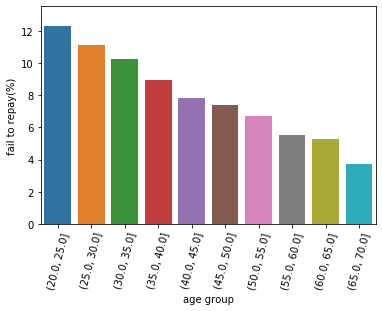

In [12]:
px=app_train['DAYS_BIRTH_YEAR_equal_width_age']
py=app_train['TARGET']*100
import seaborn as sns
sns.barplot(px,py,errwidth=0)
plt.xlabel('age group')
plt.ylabel('fail to repay(%)')
plt.xticks(rotation=75)
plt.show()

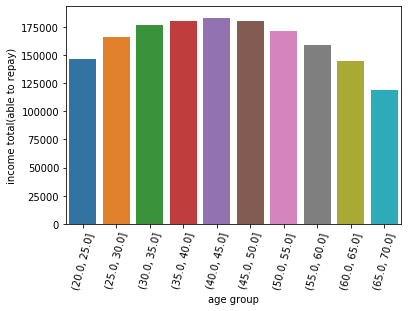

In [16]:
px=app_train.loc[app_train['TARGET']==0,'DAYS_BIRTH_YEAR_equal_width_age']
py=app_train.loc[app_train['TARGET']==0,'AMT_INCOME_TOTAL']
import seaborn as sns
sns.barplot(px,py,errwidth=0)
plt.xlabel('age group')
plt.ylabel('income total(able to repay)')
plt.xticks(rotation=75)
plt.show()

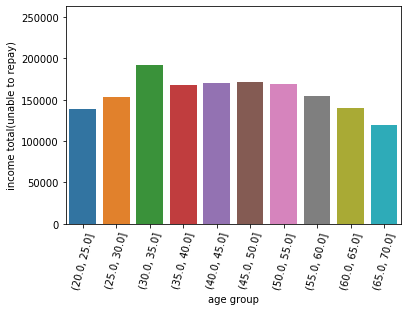

In [17]:
px=app_train.loc[app_train['TARGET']==1,'DAYS_BIRTH_YEAR_equal_width_age']
py=app_train.loc[app_train['TARGET']==1,'AMT_INCOME_TOTAL']
import seaborn as sns
sns.barplot(px,py,errwidth=0)
plt.xlabel('age group')
plt.ylabel('income total(unable to repay)')
plt.xticks(rotation=75)
plt.show()

In [ ]:
#有能力還款之民眾的所得在各個年齡層均比沒能力還款之民眾所的高